Example notebook showing how to use the MCMC sampler (currently in development)

In [7]:
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import emcee

In [8]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [9]:
from nnest import MCMCSampler
from nnest.likelihoods import *
from nnest.priors import *

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [11]:
# Likelihood
#prior = UniformPrior(2, -5, 5)
#like = Himmelblau(2)
#prior = UniformPrior(2, -2, 12)
#like = Rosenbrock(2)
#prior = UniformPrior(2, -5, 5)
#like = Gaussian(2, 0.9)
prior = UniformPrior(2, -20, 20)
like = Eggbox(2)
#prior = UniformPrior(2, -3, 3)
#like = GaussianShell(2)
#prior = UniformPrior(2, -8, 8)
#like = GaussianMix(2)

In [12]:
sampler = MCMCSampler(like.x_dim, like, hidden_dim=16, num_blocks=3, flow='spline', prior=prior)

<bound method UniformPrior.sample of <nnest.priors.UniformPrior object at 0x7fe4a8047d60>>
Creating directory for new run logs/test/run20
[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=23, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=

In [13]:
init_samples = sampler._init_samples(propose_scale=1.0, temperature=10.0, num_chains=10)

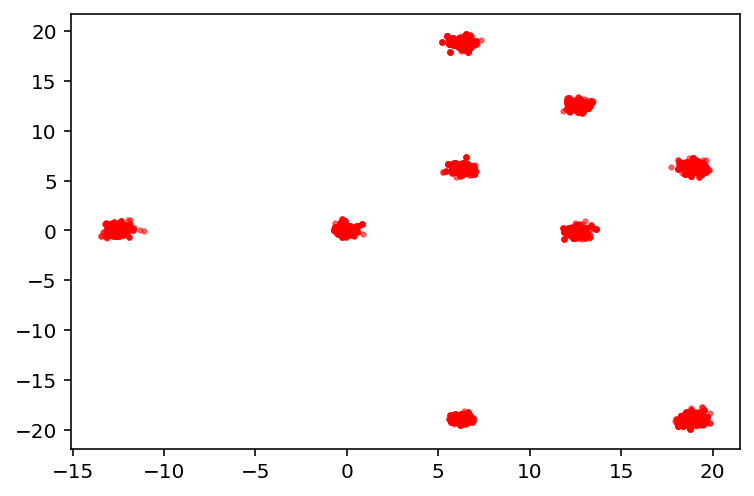

In [14]:
if like.x_dim == 2:
    plt.scatter(init_samples[:, 0], init_samples[:, 1], c='r', s=5, alpha=0.5)
    plt.show()

In [15]:
sampler.run(jitter=0.01, init_samples=init_samples)

[nnest.sampler] [INFO] Alpha [0.7071]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0100]
[nnest.trainer] [INFO] Epoch [1] train loss [0.0291] validation loss [0.0289]
[nnest.trainer] [INFO] Epoch [50] train loss [0.0270] validation loss [0.0270]
[nnest.trainer] [INFO] Epoch [100] train loss [0.0263] validation loss [0.0263]
[nnest.trainer] [INFO] Epoch [150] train loss [0.0261] validation loss [0.0261]
[nnest.trainer] [INFO] Epoch [200] train loss [0.0261] validation loss [0.0261]
[nnest.trainer] [INFO] Epoch [250] train loss [0.0262] validation loss [0.0262]
[nnest.trainer] [INFO] Epoch [251] ran out of patience
[nnest.trainer] [INFO] Best epoch [201] validation loss [0.0261]
[nnest.sampler] [INFO] Bootstrap step [1], ncalls [0] 
[nnest.sampler] [INFO] MCMC step [100], ncalls [268] 
[nnest.sampler] [INFO] Acceptance [0.0400] min ESS [0.7219] max ESS [3.3048] average jump distance [0.0408]
[nnest.trainer] [INFO] Number of training s

[nnest.trainer] [INFO] Epoch [500] train loss [0.0002] validation loss [0.0006]
[nnest.trainer] [INFO] Best epoch [481] validation loss [0.0006]
[nnest.sampler] [INFO] Bootstrap step [7], ncalls [1727] 
[nnest.sampler] [INFO] MCMC step [100], ncalls [182] 
[nnest.sampler] [INFO] Acceptance [0.0560] min ESS [1.5509] max ESS [1.8175] average jump distance [0.0428]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0100]
[nnest.trainer] [INFO] Epoch [1] train loss [0.0031] validation loss [0.0007]
[nnest.trainer] [INFO] Epoch [50] train loss [0.0008] validation loss [0.0002]
[nnest.trainer] [INFO] Epoch [100] train loss [0.0004] validation loss [0.0000]
[nnest.trainer] [INFO] Epoch [150] train loss [0.0002] validation loss [0.0000]
[nnest.trainer] [INFO] Epoch [184] ran out of patience
[nnest.trainer] [INFO] Best epoch [134] validation loss [-0.0002]
[nnest.sampler] [INFO] Bootstrap step [8], ncalls [1953] 
[nnest.sampler] [INFO] MCMC step [

[nnest.sampler] [INFO] Acceptance [0.0760] min ESS [1.7102] max ESS [1.8172] average jump distance [0.0402]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0100]
[nnest.trainer] [INFO] Epoch [1] train loss [0.0016] validation loss [-0.0053]
[nnest.trainer] [INFO] Epoch [50] train loss [-0.0022] validation loss [-0.0065]
[nnest.trainer] [INFO] Epoch [100] train loss [-0.0023] validation loss [-0.0072]
[nnest.trainer] [INFO] Epoch [150] train loss [-0.0028] validation loss [-0.0074]
[nnest.trainer] [INFO] Epoch [200] train loss [-0.0023] validation loss [-0.0078]
[nnest.trainer] [INFO] Epoch [250] train loss [-0.0028] validation loss [-0.0077]
[nnest.trainer] [INFO] Epoch [300] train loss [-0.0030] validation loss [-0.0081]
[nnest.trainer] [INFO] Epoch [350] train loss [-0.0031] validation loss [-0.0083]
[nnest.trainer] [INFO] Epoch [400] train loss [-0.0033] validation loss [-0.0081]
[nnest.trainer] [INFO] Epoch [450] train loss [-0.003

In [16]:
samples = [sampler.samples[i, :, :].squeeze() for i in range(sampler.samples.shape[0])]
latent_samples = [sampler.latent_samples[i, :, :].squeeze() for i in range(sampler.latent_samples.shape[0])]
loglikes = [sampler.loglikes[i, :].squeeze() for i in range(sampler.loglikes.shape[0])]

In [17]:
mc = MCSamples(samples=samples, loglikes=loglikes)

Removed no burn in


In [18]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())
print(mc.getConvergeTests())

111.7928469290389


Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      3.5090949E+00  1.0841096E+01 -7.3706696E+00  1.5761793E+01  two   -1.7640265E+01  2.4087717E+01  two   -2.3354250E+01  2.8598138E+01  two     p_{1}
param2      6.5210540E-01  1.2624484E+01 -1.1209252E+01  1.6077294E+01  two   -1.8965526E+01  1.8938471E+01  two   -1.9040179E+01  1.9028307E+01  two     p_{2}

Parameter autocorrelation lengths (effective number of samples N_eff = tot weight/weight length)

            Weight Length   Sample length           N_eff
param1           2.14E+02          214.23             116
param2           2.22E+02          222.21             112


mean convergence stats using remaining chains
param sqrt(var(chain mean)/mean(chain var))

param1        0.2371  p_{1}
param2        0.2146  p_{2}

var(mean)/mean(var) for eigenvalues of covariance of y of orthon

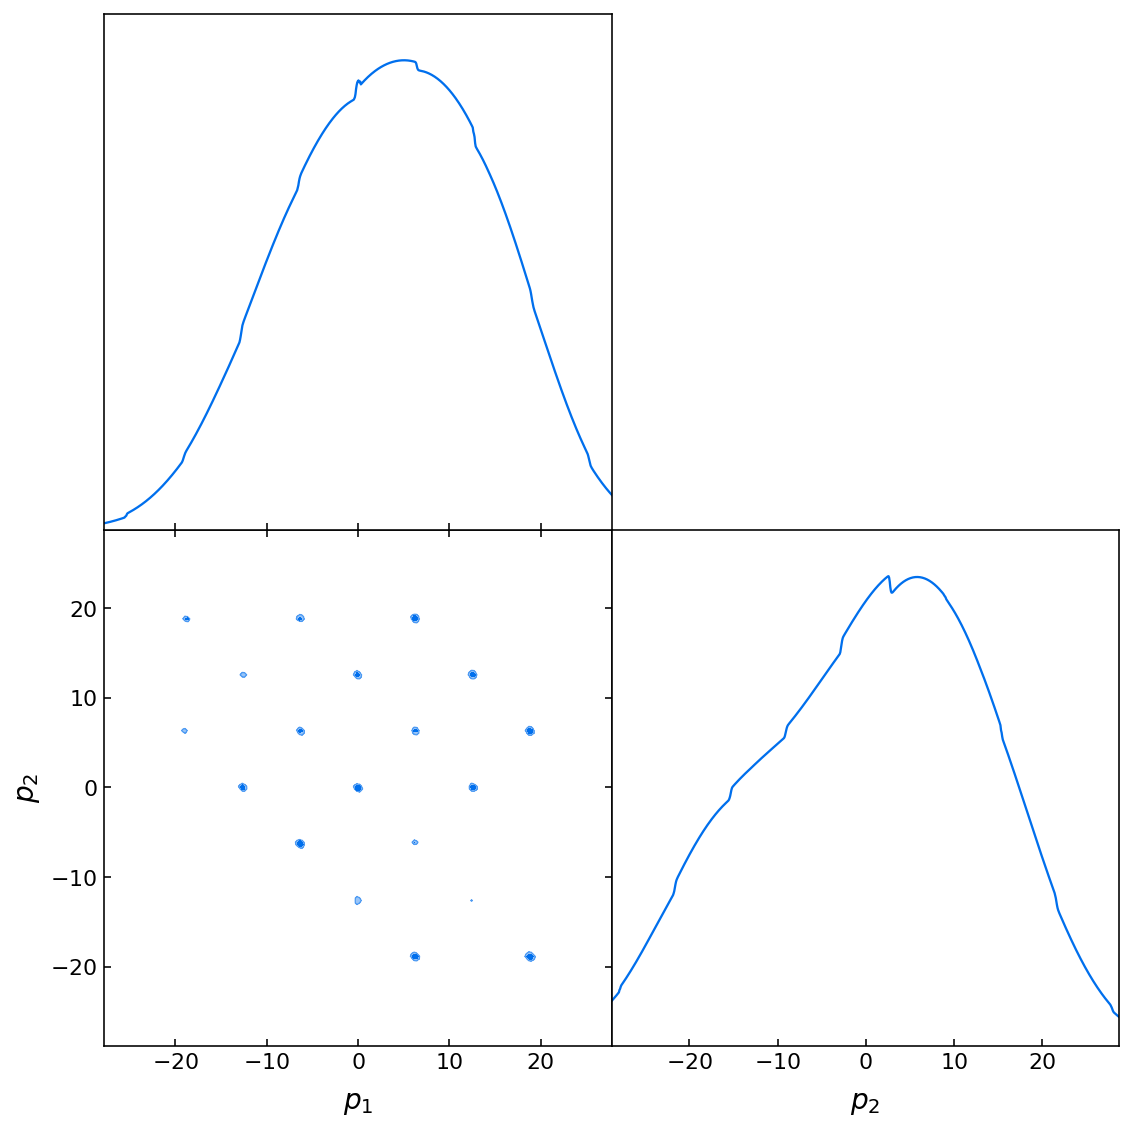

In [19]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)

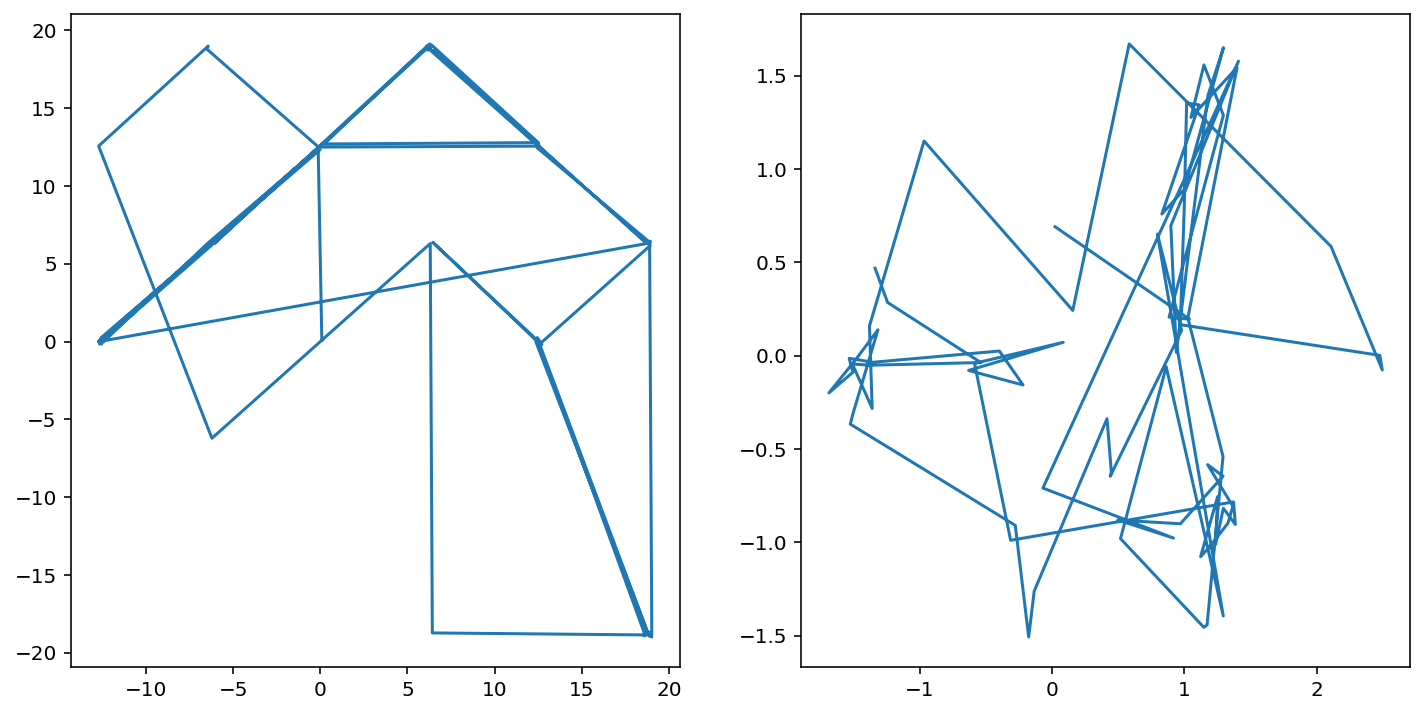

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(samples[0][0:1000,0], samples[0][0:1000,1])
ax[1].plot(latent_samples[0][0:1000,0], latent_samples[0][0:1000,1])
plt.show()